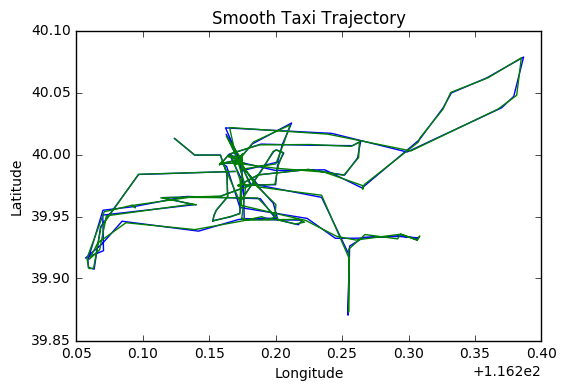

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from filterpy.kalman import KalmanFilter

path = 'C:\\Users\\vpoon\\Documents\\StartupML\\'
folder = '06\\';
file = '10203.txt'
ind_start = 400
ind_end = 600
s2_acc = .05**2 #variance of acceleration

data = np.genfromtxt(path+folder+file, dtype = None, names = ['taxi','time','longitude','latitude'], delimiter=',')
x = data['longitude'][ind_start:ind_end]
y = data['latitude'][ind_start:ind_end]
plt.plot(x,y)

#kalman
#I chose to use a RTS Kalman Smoother that tracks both position and velocity.  
#Acceleration is normally distributed with standard deviation s2_acc. 
#Velocity and acceleration is unobserved but can be dervived from Newton's laws.    

#create a list of (2,1) matrixes as this is what batch_filter will accept 
zs = []
ztemp = np.stack((x,y), axis=1)
for i in range(len(ztemp)):
    z1 = ztemp[i,:]
    z1.resize(2,1)
    zs.append(z1)
    
#Set up parameters of Kalman smoother
f = KalmanFilter (dim_x=4, dim_z=2)
f.x = np.vstack((x[0],[0.],y[0],[0]))
f.F = np.array([[1.,1.,0.,0.],[0.,1.,0.,0.],[0.,0.,1.,1.],[0.,0.,0.,1.]]) #transition matrix
f.H = np.array([[1.,0.,0.,0.],[0.,0.,1,0.]]) #measurement function
#f.P *=10.
f.R = np.eye(2)*.001**2 #measurement noise(based roughly on a 100M standard deviation converted to degrees, although GPS claims 95% CI of 8M)
f.Q = np.array([[.25,.5,0.,0.],[.5, 1., 0., 0.],[0.,0.,.25,.5],[0.,0.,.5, 1]])*s2_acc

(mu,cov,_,_) = f.batch_filter(zs)
(xs, Ps, Ks) = f.rts_smoother(mu, cov)

xSmooth = xs[:,0]
ySmooth = xs[:,2]
plt.plot(xSmooth,ySmooth,'g')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Smooth Taxi Trajectory')

plt.show()


